## Importing the librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('/home/dona-erick/Projet-Etudiant/Data_Health_Student/Data_on_health_frequentation_student_world/world-education-data.csv')
df = pd.read_csv('/home/dona-erick/Projet-Etudiant/Data_Health_Student/Data_on_health_frequentation_student_world/student_monnitoring_data.csv')

In [3]:
data.head(5)

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [4]:
df.head(5)

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High


## Renommer les colonnes

In [5]:
### rename the columns
df.rename(
    columns={
        'Student ID': "ID",
        'Date':'Date',
        "Class Time": "Heure_cours",
        'Attendance Status':"status_presence",
        "Stres Level(GSR)":'Niveau_stress',
        "Sleep Hours":'Temps_sommeil',
        "Anxiety Level":"Niveau_anxiety",
        "Mood Score":"Hummeur_score",
        "Risk Level":"Niveau_risque"
    }, inplace=True
)

In [6]:
df.head()

,ID,Date,Heure_cours,status_presence,Stress Level (GSR),Temps_sommeil,Niveau_anxiety,Hummeur_score,Niveau_risque
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,15000.0,250.500000,144.342090,1.0,125.75,250.50,375.25,500.0
Stress Level (GSR),15000.0,2.762538,1.301927,0.5,1.64,2.76,3.90,5.0
Temps_sommeil,15000.0,6.996780,1.150973,5.0,6.00,7.00,8.00,9.0
Niveau_anxiety,15000.0,5.546867,2.870323,1.0,3.00,6.00,8.00,10.0
Hummeur_score,15000.0,5.471533,2.868984,1.0,3.00,5.00,8.00,10.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15000 non-null  int64  
 1   Date                15000 non-null  object 
 2   Heure_cours         15000 non-null  object 
 3   status_presence     15000 non-null  object 
 4   Stress Level (GSR)  15000 non-null  float64
 5   Temps_sommeil       15000 non-null  float64
 6   Niveau_anxiety      15000 non-null  int64  
 7   Hummeur_score       15000 non-null  int64  
 8   Niveau_risque       15000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


## Anlyse univariéé

Niveau_risque


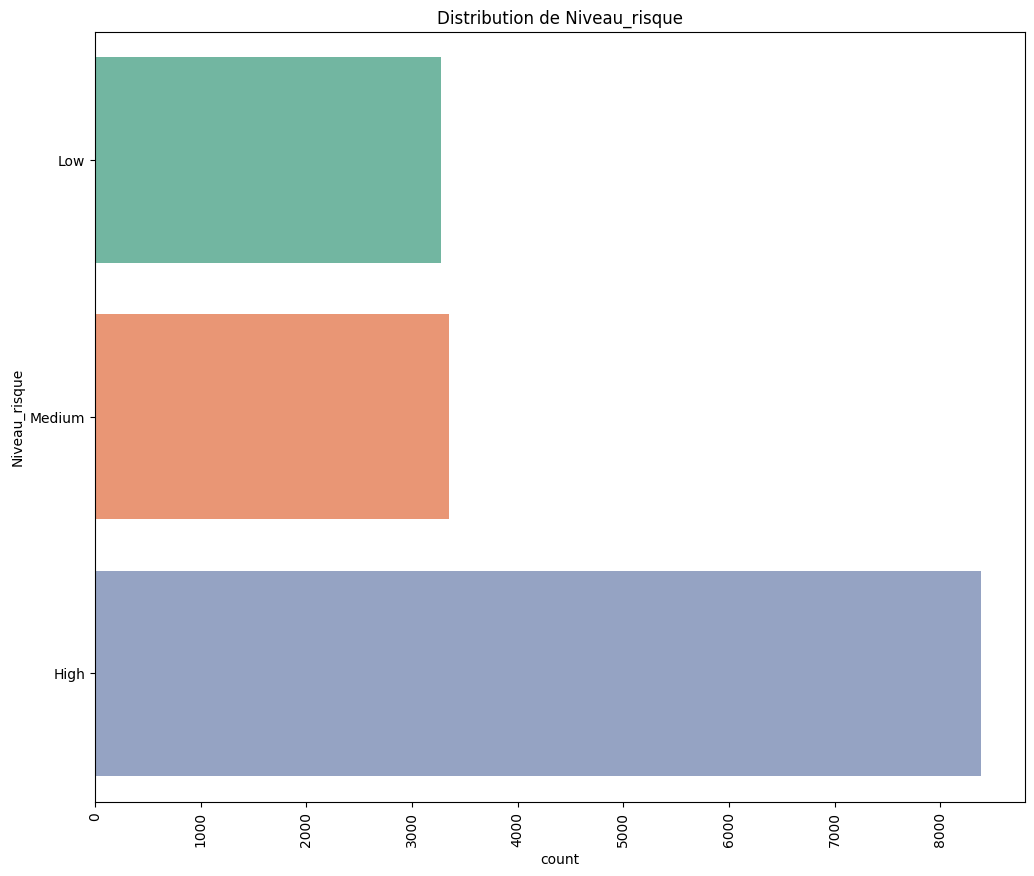

status_presence


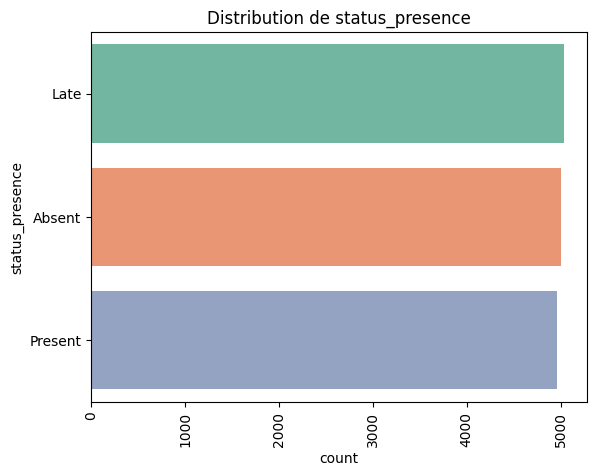

In [9]:
categorical = ['Niveau_risque', "status_presence"]
plt.figure(figsize=(12, 10))
for cat in categorical:
    print(cat)
    sns.countplot(data=df, y=cat, palette='Set2')
    plt.title(f'Distribution de {cat}')
    plt.xticks(rotation=90)
    plt.show()

Temps_sommeil


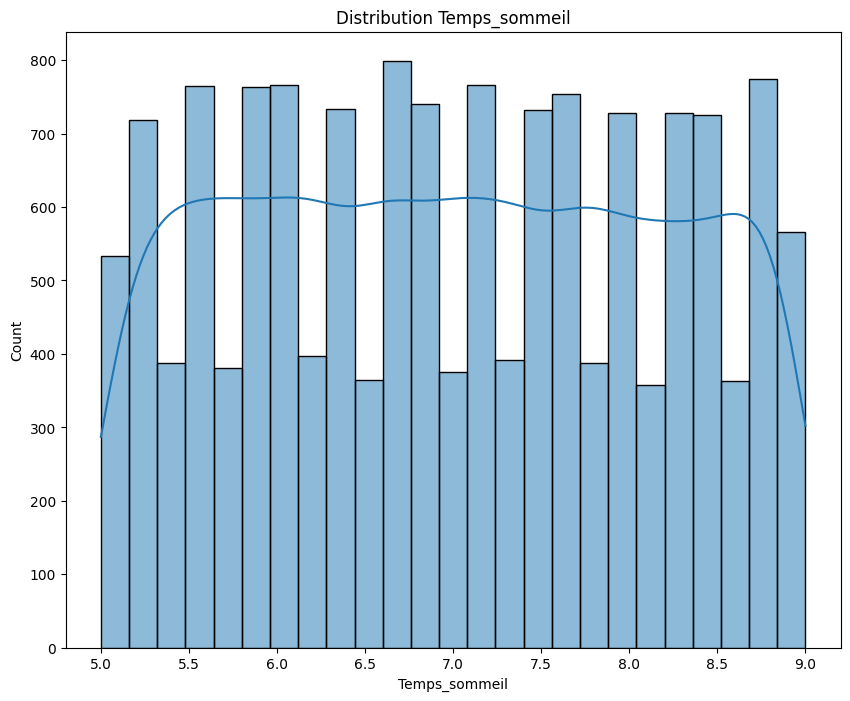

Niveau_anxiety


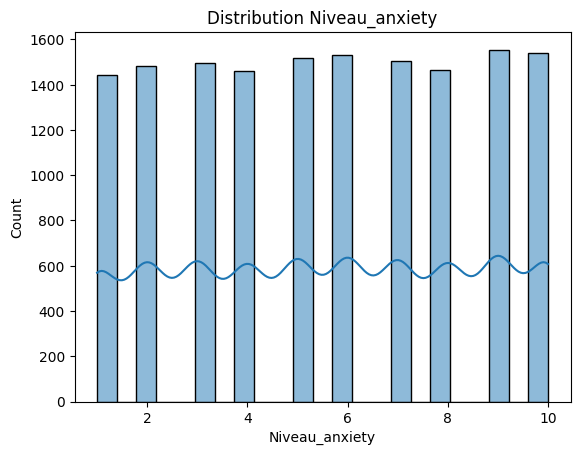

Hummeur_score


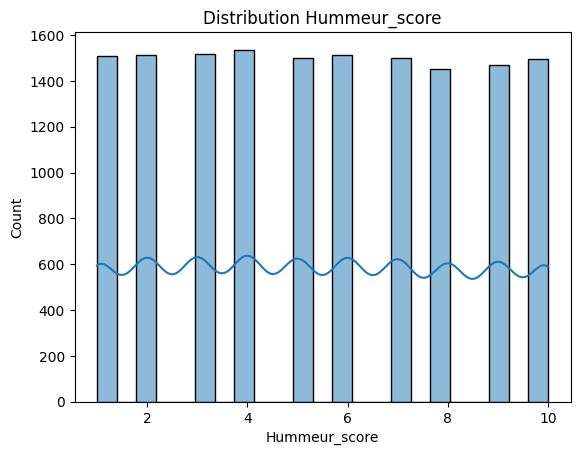

In [10]:
numerical = ["Temps_sommeil", "Niveau_anxiety", "Hummeur_score"]
plt.figure(figsize=(10, 8))
for var in numerical:
    print(var)
    sns.histplot(data =df, x=var, kde=True)
    plt.title(f'Distribution {var}')
    plt.show()    

## Analyse Biovariéé et Multivariée

Text(0.5, 1.0, 'Niveau  du risque des étudiants par année')

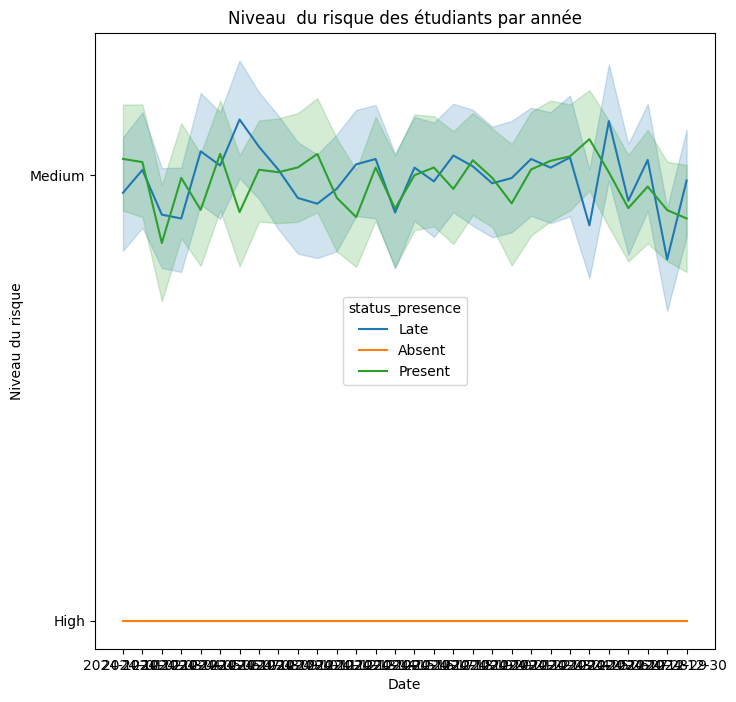

In [11]:
plt.figure(figsize=(8, 8))
sns.lineplot(data =df, x='Date', y='Niveau_risque', hue='status_presence')
plt.xlabel('Date')
plt.ylabel('Niveau du risque')
plt.title("Niveau  du risque des étudiants par année" )

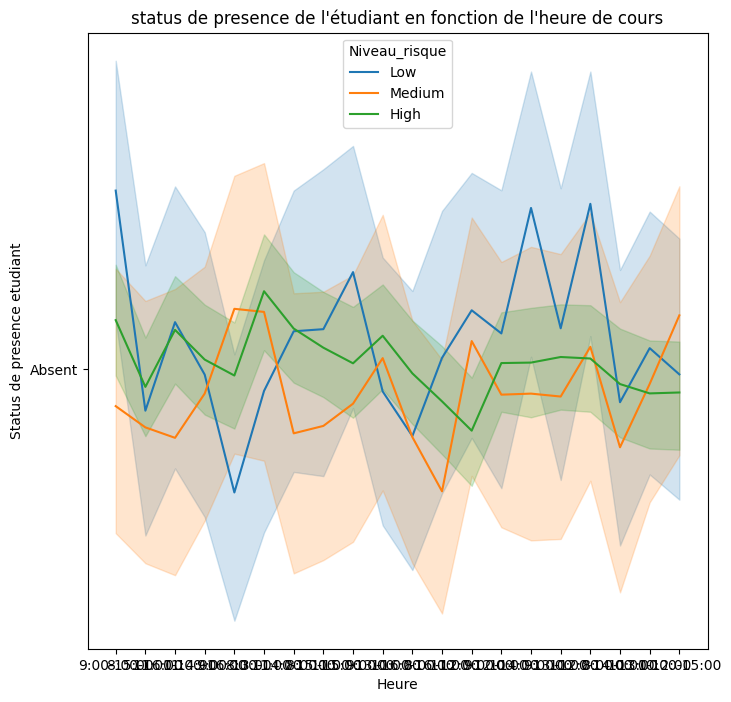

In [12]:
plt.figure(figsize=(8, 8))
sns.lineplot(data =df, x='Heure_cours', y='status_presence', hue='Niveau_risque')
plt.xlabel('Heure')
plt.ylabel('Status de presence etudiant')
plt.title("status de presence de l'étudiant en fonction de l'heure de cours" )
plt.show()

Temps_sommeil


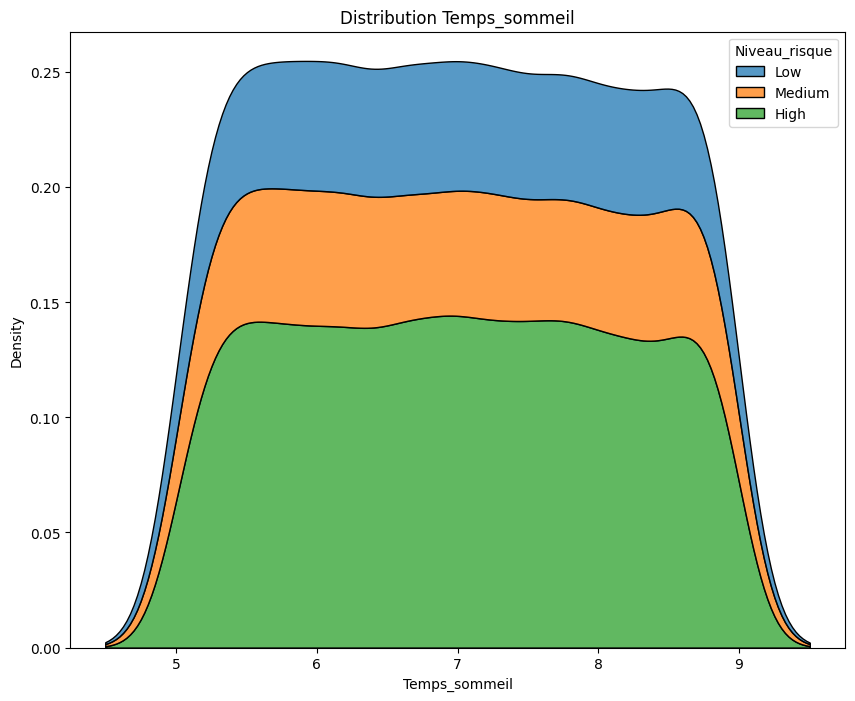

Niveau_anxiety


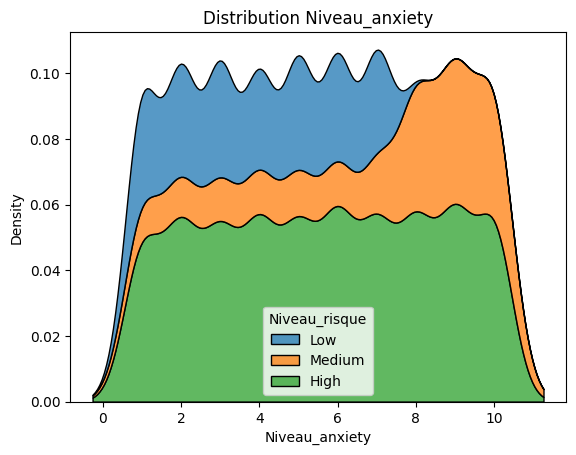

Hummeur_score


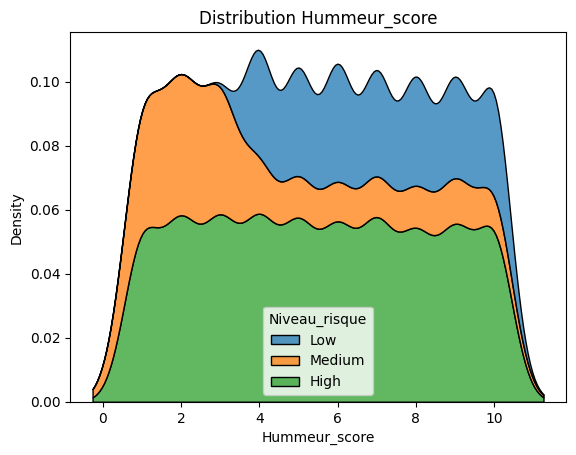

In [13]:
plt.figure(figsize=(10, 8))
for var in numerical:
    print(var)
    sns.kdeplot(data =df, x=var, hue='Niveau_risque', multiple='stack')
    plt.title(f'Distribution {var}')
    plt.show()   

<Figure size 1200x1000 with 0 Axes>

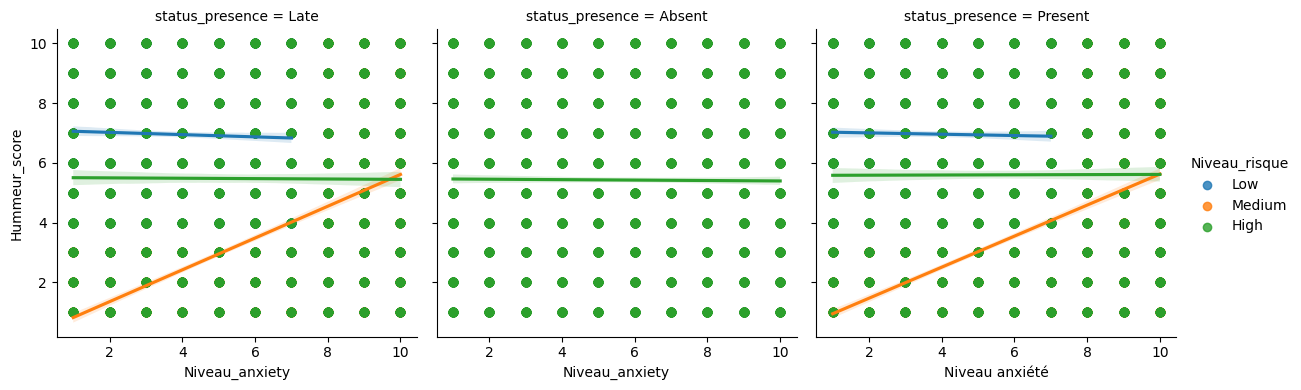

In [14]:
plt.figure(figsize=(12, 10))
sns.lmplot(data=df, x='Niveau_anxiety', y='Hummeur_score', hue='Niveau_risque',
           col='status_presence', height=4)
plt.xlabel('Niveau anxiété')
plt.ylabel('Score hummeur')
plt.show()

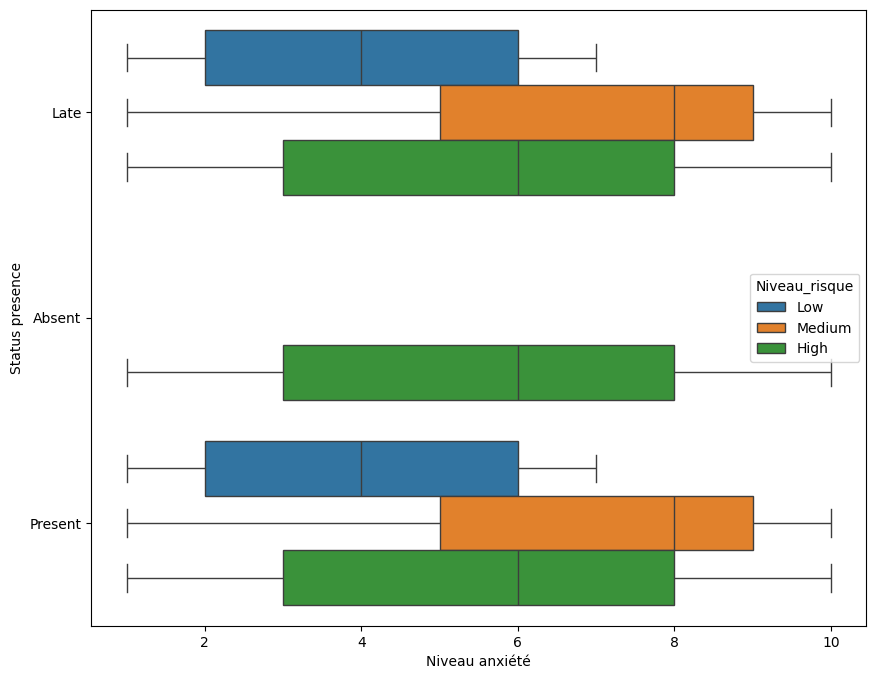

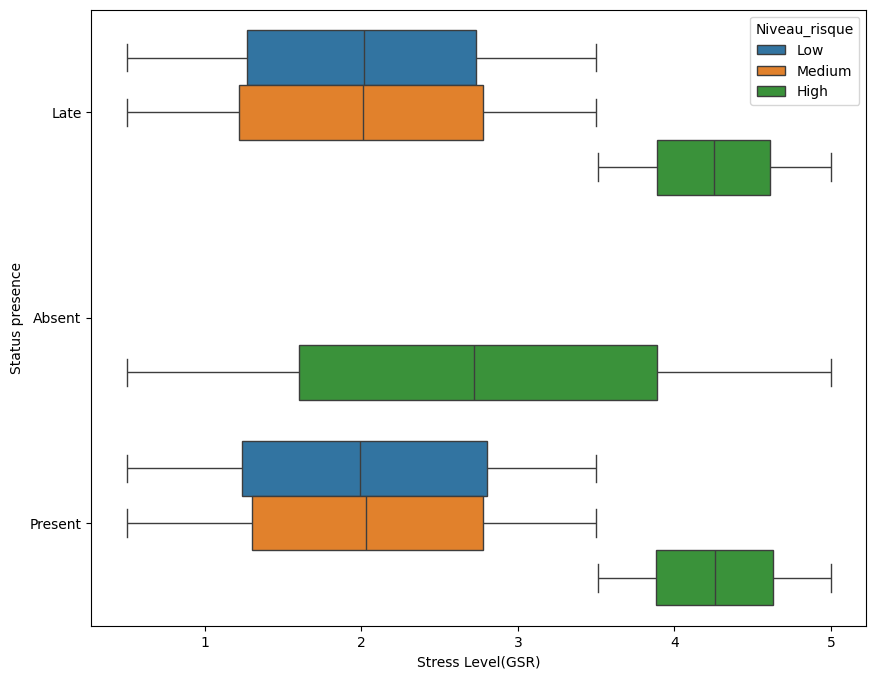

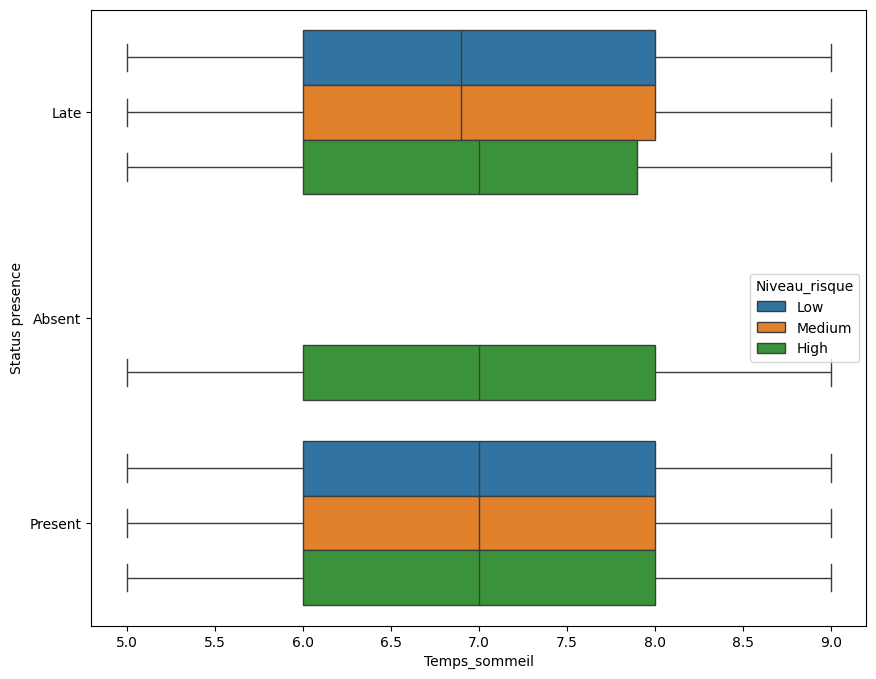

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(data =df, x='Niveau_anxiety', y='status_presence', hue='Niveau_risque')
plt.xlabel('Niveau anxiété')
plt.ylabel('Status presence')
plt.show()


plt.figure(figsize=(10, 8))
sns.boxplot(data =df, x='Stress Level (GSR)', y='status_presence', hue='Niveau_risque')
plt.xlabel('Stress Level(GSR)')
plt.ylabel('Status presence')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data =df, x='Temps_sommeil', y='status_presence', hue='Niveau_risque')
plt.xlabel('Temps_sommeil')
plt.ylabel('Status presence')
plt.show()

In [16]:
df.head()

,ID,Date,Heure_cours,status_presence,Stress Level (GSR),Temps_sommeil,Niveau_anxiety,Hummeur_score,Niveau_risque
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  15000 non-null  int64         
 1   Date                15000 non-null  datetime64[ns]
 2   Heure_cours         15000 non-null  object        
 3   status_presence     15000 non-null  object        
 4   Stress Level (GSR)  15000 non-null  float64       
 5   Temps_sommeil       15000 non-null  float64       
 6   Niveau_anxiety      15000 non-null  int64         
 7   Hummeur_score       15000 non-null  int64         
 8   Niveau_risque       15000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.0+ MB


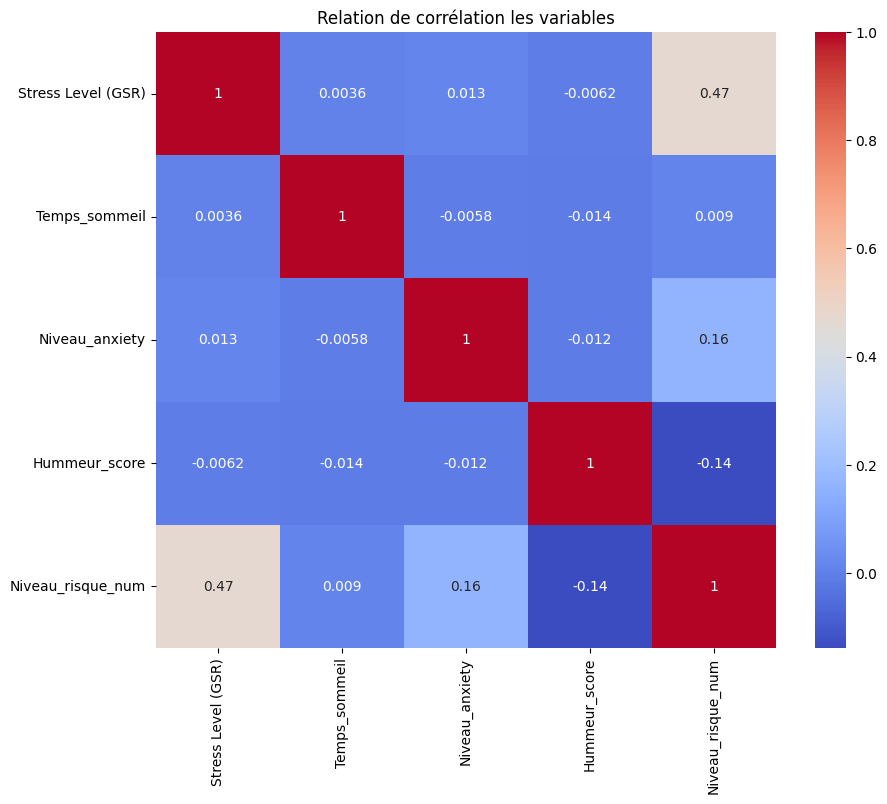

In [18]:
df['Niveau_risque_num'] = df['Niveau_risque'].map({"Low":0, "Medium":1, "High":2})
numerical = ['Stress Level (GSR)', "Temps_sommeil", "Niveau_anxiety", "Hummeur_score", "Niveau_risque_num"]

corr = df[numerical].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Relation de corrélation les variables')
plt.show()

In [19]:
corr

,Stress Level (GSR),Temps_sommeil,Niveau_anxiety,Hummeur_score,Niveau_risque_num
Stress Level (GSR),1.000000,0.003575,0.013150,-0.006250,0.467000
Temps_sommeil,0.003575,1.000000,-0.005824,-0.014243,0.009004
Niveau_anxiety,0.013150,-0.005824,1.000000,-0.012136,0.161306
Hummeur_score,-0.006250,-0.014243,-0.012136,1.000000,-0.138883
Niveau_risque_num,0.467000,0.009004,0.161306,-0.138883,1.000000


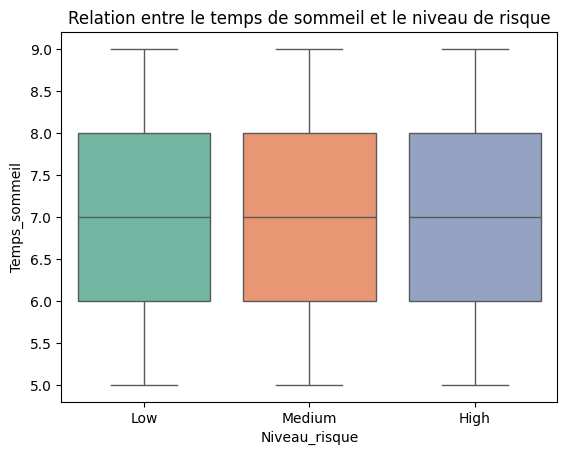

In [20]:
sns.boxplot(data=df, x="Niveau_risque", y="Temps_sommeil", palette="Set2")
plt.title("Relation entre le temps de sommeil et le niveau de risque")
plt.show()


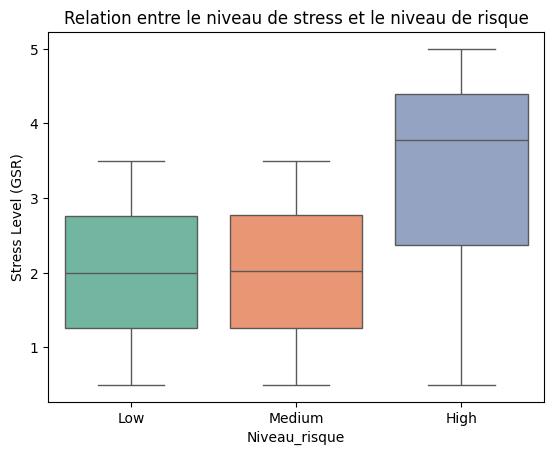

In [21]:
sns.boxplot(data=df, x="Niveau_risque", y="Stress Level (GSR)", palette="Set2")
plt.title("Relation entre le niveau de stress et le niveau de risque")
plt.show()


## Variation du stress level / temps de sommeil dans le temps

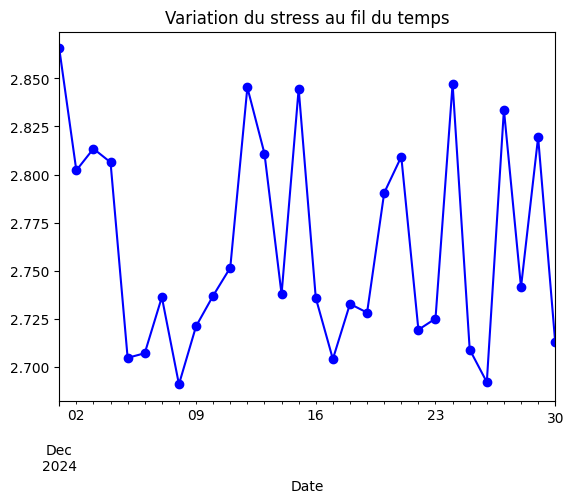

In [22]:
daily_stress = df.groupby('Date')['Stress Level (GSR)'].mean()
plt.subplot()
daily_stress.plot(kind='line', marker='o', color ='blue')
plt.title('Variation du stress au fil du temps')
plt.show()

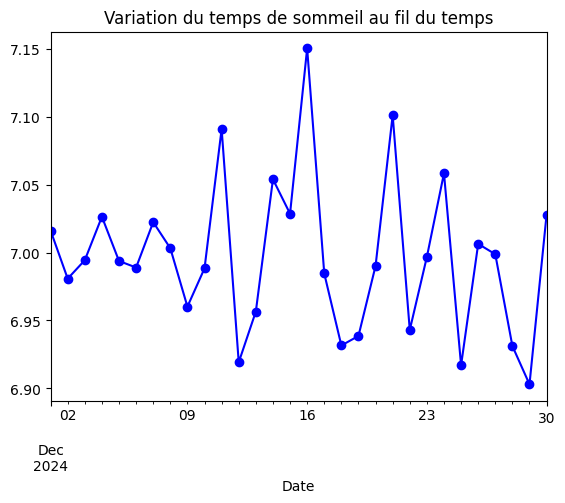

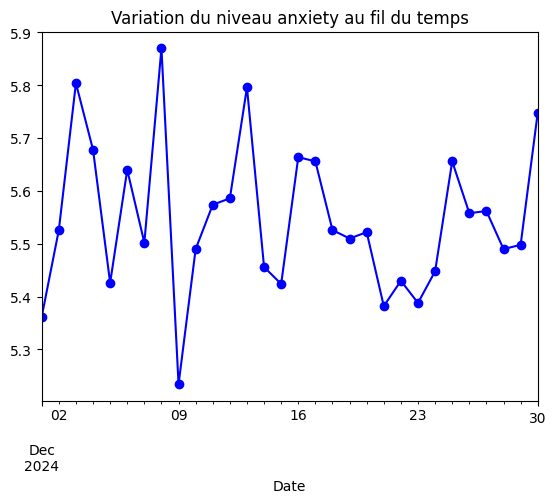

In [23]:
daily_stress = df.groupby('Date')['Temps_sommeil'].mean()
plt.subplot()
daily_stress.plot(kind='line', marker='o', color ='blue')
plt.title('Variation du temps de sommeil au fil du temps')
plt.show()


daily_stress = df.groupby('Date')['Niveau_anxiety'].mean()
plt.subplot()
daily_stress.plot(kind='line', marker='o', color ='blue')
plt.title('Variation du niveau anxiety au fil du temps')
plt.show()

## Analyse du niveau de risque des étudiants par status de présence

In [24]:
Presence = df.groupby(['status_presence', "Niveau_risque"]).size().reset_index(name='count')
print(Presence)

  status_presence Niveau_risque  count
0          Absent          High   5002
1            Late          High   1719
2            Late           Low   1686
3            Late        Medium   1627
4         Present          High   1659
5         Present           Low   1585
6         Present        Medium   1722


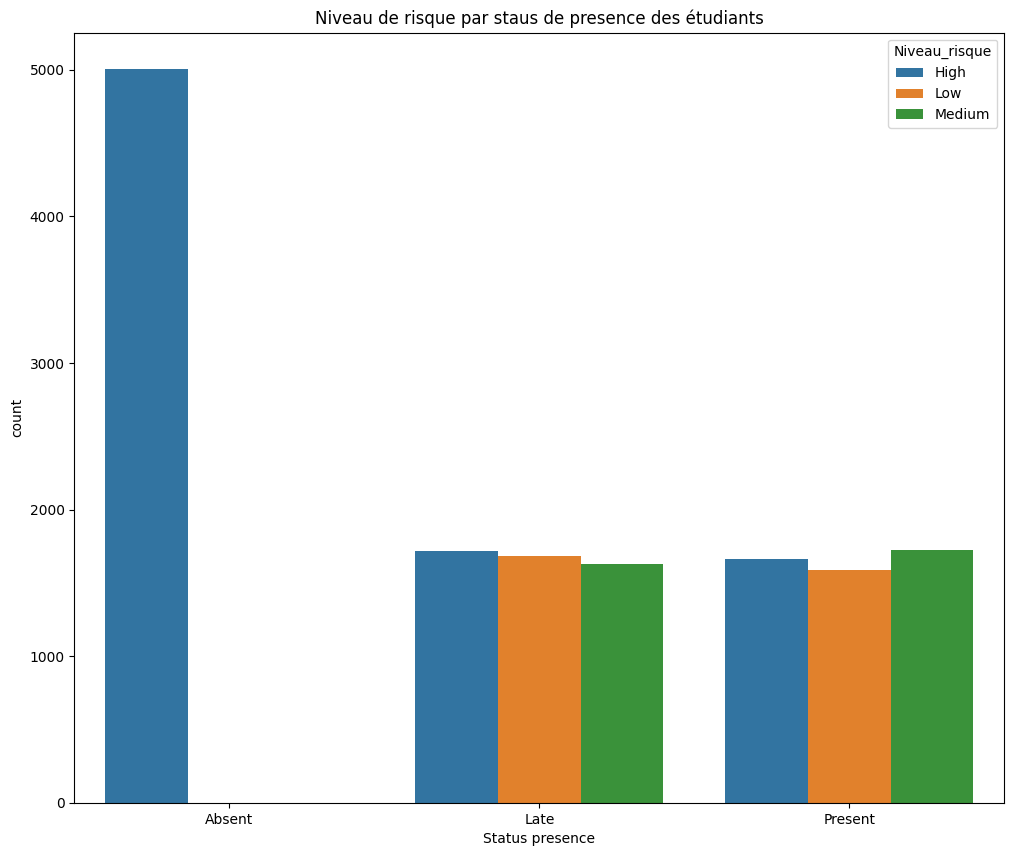

In [25]:
plt.figure(figsize=(12, 10))
sns.barplot(data=Presence, x ='status_presence', y='count', hue='Niveau_risque')
plt.title('Niveau de risque par staus de presence des étudiants')
plt.xlabel('Status presence')
plt.show()

## Quelques Tests Statistiques pour comparer les différentes variables

### Test de Khi-deux

In [26]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Niveau_anxiety"], df["Niveau_risque"])

# Test du khi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Statistique du khi-deux:", chi2)
print("p-valeur:", p)

if p < 0.05:
    print("Conclusion: Le statut de présence influence significativement le niveau de risque.")
else:
    print("Conclusion: Pas d'influence significative du statut de présence sur le niveau de risque.")


Statistique du khi-deux: 2692.000939739498
p-valeur: 0.0
Conclusion: Le statut de présence influence significativement le niveau de risque.


## Traitement des données

In [27]:
df.sample(5)

,ID,Date,Heure_cours,status_presence,Stress Level (GSR),Temps_sommeil,Niveau_anxiety,Hummeur_score,Niveau_risque,Niveau_risque_num
11613,388,2024-12-04,8:00-16:00,Late,2.41,8.8,5,7,Low,0
2143,72,2024-12-14,11:00-16:00,Present,1.45,8.3,2,8,Low,0
8851,296,2024-12-02,11:00-13:00,Absent,3.46,6.8,1,9,High,2
5180,173,2024-12-21,11:00-12:00,Present,3.01,7.7,5,7,Low,0
14783,493,2024-12-24,8:00-15:00,Absent,2.54,8.1,4,3,High,2


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
## Feature ingeneering 
#import datetime
## calculer la duree en heure de cours
#def calcul_duree(heure_cours):
 #   debut, fin = heure_cours.split("-")
 #   debut = pd.to_datetime(debut, format='%H:%M')
  #  fin=pd.to_datetime(fin, format='%H:%M')
   # duree = (fin-debut).seconds / 3600
   # return duree

#df['Duree_cours'] = df['Heure_cours'].apply(calcul_duree)
#df.sample(5)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  15000 non-null  int64         
 1   Date                15000 non-null  datetime64[ns]
 2   Heure_cours         15000 non-null  object        
 3   status_presence     15000 non-null  object        
 4   Stress Level (GSR)  15000 non-null  float64       
 5   Temps_sommeil       15000 non-null  float64       
 6   Niveau_anxiety      15000 non-null  int64         
 7   Hummeur_score       15000 non-null  int64         
 8   Niveau_risque       15000 non-null  object        
 9   Niveau_risque_num   15000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    GroupKFold,
    StratifiedGroupKFold,
    cross_val_score,
)
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    precision_recall_curve,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
)
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

numerical = ["Stress Level (GSR)", "Temps_sommeil", "Niveau_anxiety", "Hummeur_score"]
categorical = ["status_presence"]

pipeline_numeric = Pipeline(steps=[("scaler", StandardScaler())])
pipeline_categoric = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_numeric, numerical),
        ("cat", pipeline_categoric, categorical),
    ]
)


label_encoder = LabelEncoder()
X = df.drop(["ID", "Date", "Heure_cours", "Niveau_risque_num"], axis=1)
y = df["Niveau_risque"]
y_encoded = label_encoder.fit_transform(y)


model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            RandomForestClassifier(random_state=80, max_depth=5, n_estimators=200),
        ),
    ]
)

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y_encoded, test_size=0.2, random_state=80
)

## fonction de modelisation

model_pipeline.fit(xtrain, ytrain)
predictions = model_pipeline.predict(xtest)

Accuracy = accuracy_score(ytest, predictions)
Precision = precision_score(ytest, predictions, average="macro")
Report = classification_report(ytest, predictions)
confusion = confusion_matrix(ytest, predictions)
print(f"Accuracy: {Accuracy:.2f}")
print(f"Precision: {Precision:.2f}")
print("Classification Report:")
print(Report)
print("Matrix de confusion:")
print(confusion)

Accuracy: 1.00
Precision: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1639
           1       1.00      1.00      1.00       674
           2       1.00      1.00      1.00       687

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Matrix de confusion:
[[1639    0    0]
 [   0  674    0]
 [   0    0  687]]


In [32]:
## corss validation

scores = cross_val_score(model_pipeline, X, y_encoded, cv=5, scoring='accuracy')
print(f"Moyenne score: {scores.mean():.2f}")

Moyenne score: 1.00


In [33]:
feature_importance = model_pipeline.named_steps['classifier'].feature_importances_
features = numerical +list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out())
result = pd.DataFrame({'importances': feature_importance, 
                       'columns': features})
result.sort_values(ascending=True, by='importances')


,importances,columns
1,0.001492,Temps_sommeil
6,0.043610,status_presence_Present
5,0.052271,status_presence_Late
2,0.118028,Niveau_anxiety
3,0.122995,Hummeur_score
4,0.302124,status_presence_Absent
0,0.359480,Stress Level (GSR)


<Axes: xlabel='importances', ylabel='columns'>

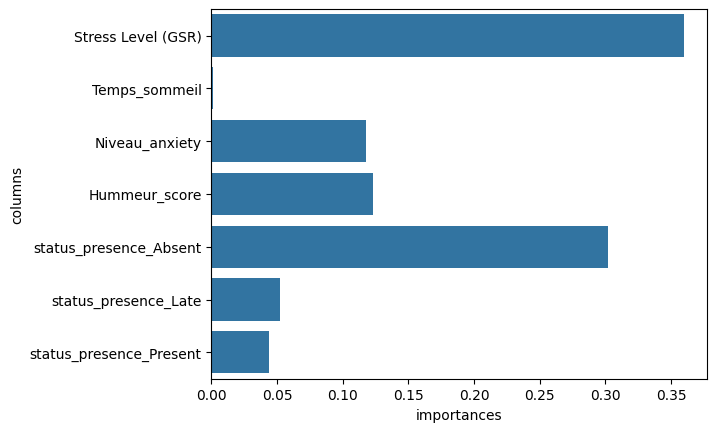

In [34]:
sns.barplot(data=result, x='importances', y='columns')

## Reconstruction du pipeline en introduisant autres focntionnalités

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime


class HeureCoursTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        durees = []
        for heure_cours in X["Heure_cours"]:
            debut, fin = heure_cours.split("-")
            debut = datetime.strptime(debut, "%H:%M")
            fin = datetime.strptime(fin, "%H:%M")
            duree = (fin - debut).seconds / 3600
            durees.append(duree)
        return pd.DataFrame({"Duree_cours": durees})


numerical_features = [
    "Stress Level (GSR)",
    "Temps_sommeil",
    "Niveau_anxiety",
    "Hummeur_score",
]
categorical_features = ["status_presence"]


pipeline_numeric = Pipeline(steps=[("scaler", StandardScaler())])
pipeline_categoric = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]
)

heure_cours_pipeline = Pipeline(steps=[("houre_transformer", HeureCoursTransformer())])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_numeric, numerical_features),
        ("cat", pipeline_categoric, categorical_features),
        ("heure", heure_cours_pipeline, ["Heure_cours"]),
    ]
)


label_encoder = LabelEncoder()
X = df.drop(["ID", "Date", "Niveau_risque_num"], axis=1)
y = df["Niveau_risque"]
y_encoded = label_encoder.fit_transform(y)


model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            RandomForestClassifier(random_state=80, max_depth=5, n_estimators=200),
        ),
    ]
)

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y_encoded, test_size=0.2, random_state=80
)

model_pipeline.fit(xtrain, ytrain)
predictions = model_pipeline.predict(xtest)

Accuracy = accuracy_score(ytest, predictions)
Precision = precision_score(ytest, predictions, average="micro")
Report = classification_report(ytest, predictions)
confusion = confusion_matrix(ytest, predictions)
print(f"Accuracy: {Accuracy:.2f}")
print(f"Precision: {Precision:.2f}")
print("Classification Report:")
print(Report)
print("Matrix de confusion:")
print(confusion)

Accuracy: 1.00
Precision: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1639
           1       1.00      1.00      1.00       674
           2       1.00      1.00      1.00       687

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Matrix de confusion:
[[1639    0    0]
 [   0  674    0]
 [   0    0  687]]


In [37]:
scores = cross_val_score(model_pipeline, X, y_encoded, cv=5, scoring='accuracy')
print(f"Moyenne score: {scores.mean():.2f}")

Moyenne score: 1.00


In [38]:
## rooc_auc

probabilities = model_pipeline.predict_proba(xtest)
roc_auc = roc_auc_score(ytest, probabilities, multi_class='ovr')
print(f"ROC-AUC-SCORE: {roc_auc:.2f}")

ROC-AUC-SCORE: 1.00


## Phase testing

In [40]:
## Phase de test sur des nouvelles données

np.random.seed(42)


n_samples = 200

data = {
    'ID': np.arange(1, n_samples + 1),
    'Date': pd.date_range(start="2024-01-01", periods=n_samples, freq='D'),
    'Heure_cours': np.random.choice(['8:00-12:00', '9:00-15:00', '11:00-16:00', '12:00-18:00'], size=n_samples),
    'status_presence': np.random.choice(['Present', 'Absent', 'Late'], size=n_samples),
    'Stress Level (GSR)': np.random.uniform(0, 5, size=n_samples),
    'Temps_sommeil': np.random.uniform(4, 9, size=n_samples),
    'Niveau_anxiety': np.random.randint(1, 10, size=n_samples),
    'Hummeur_score': np.random.randint(1, 11, size=n_samples),
    'Niveau_risque': np.random.choice(['Low', 'Medium', 'High'], size=n_samples)
}

# Create the DataFrame
df_new = pd.DataFrame(data)
prediction = model_pipeline.predict(df_new)
print(f"prediction:", prediction[0])

prediction: 2


## Enregister le modèle

In [41]:
import joblib

## save the pipeline model 
joblib.dump(model_pipeline, 'model_etudiant.pkl')



['model_etudiant.pkl']

## Mettre en place une api et app streamlit qui donne la predictions.

In [42]:
### Directions 
#Fastapi
#streamlit

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime

class HeureCoursTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        durees = []
        for heure_cours in X['Heure_cours']:
            debut, fin = heure_cours.split('-')
            debut = datetime.strptime(debut, '%H:%M')
            fin = datetime.strptime(fin, '%H:%M')
            duree = (fin-debut).seconds/3600
            durees.append(duree)
        return pd.DataFrame({'Duree_cours': durees})
    
with open("/home/dona-erick/Projet-Etudiant/Data_python/heure_cours_transformer.py", "w") as f:
    f.write('''
            from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime

class HeureCoursTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        durees = []
        for heure_cours in X['Heure_cours']:
            debut, fin = heure_cours.split('-')
            debut = datetime.strptime(debut, '%H:%M')
            fin = datetime.strptime(fin, '%H:%M')
            duree = (fin-debut).seconds/3600
            durees.append(duree)
        return pd.DataFrame({'Duree_cours': durees})
        ''')